In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.drop(["id"], axis=1, inplace=True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
floor_counts = data['floors'].value_counts().to_frame()
floor_counts

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


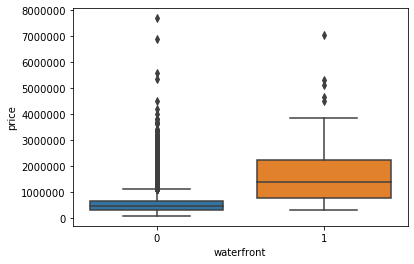

In [8]:
sns.boxplot(x="waterfront", y="price", data=data)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 8085746.705176663)

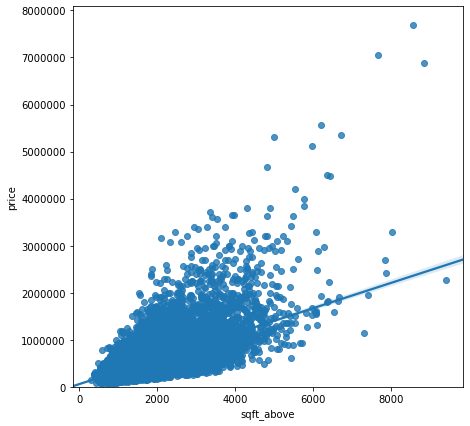

In [9]:
width = 7
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="sqft_above", y="price", data=data)
plt.ylim(0,)

In [10]:

lm1= LinearRegression()
x = data[['sqft_living']]
y = data['price']
lm1.fit(x, y)
print(lm1.coef_)
print(lm1.intercept_)

[280.6235679]
-43580.74309447361


In [11]:
print("The r2 is:", lm1.score(x,y))

The r2 is: 0.49285321790379316


In [12]:
lm2  = LinearRegression()
lm2.fit(data[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]],data['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lm2.score(data[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]],data['price'])


0.6577151058279326

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
 z = data[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]]

In [21]:
Y_hat = lm2.predict(z)
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(z,y)

ypipe=pipe.predict(z)
ypipe[0:10]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 283413.0766304 ,  662377.8434901 ,  305956.87442554,
        408313.00471754,  532334.67094092, 1509628.89075478,
        221953.15499837,  191246.56063389,  402311.35124227,
        295257.49486311])

In [24]:
# fit the model 
lm2.fit(z, data['price'])
# Find the R^2
print('The R-square is: ', lm2.score(z, data['price']))

The R-square is:  0.6577151058279326


In [26]:
Y_predict_multifit = lm2.predict(z)

In [28]:
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(data['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  46131837578.5996


In [35]:
#create and fit a regression objec
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]])
x_test_pr=pr.fit_transform(x_test[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]])

In [37]:
from sklearn.linear_model import Ridge

In [38]:
RigeModel=Ridge(alpha=0.1)

In [39]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
yhat = RigeModel.predict(x_test_pr)

In [41]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [569759.18811733 488421.21727867 675245.83736616 690646.83744213]
test set : [ 459000.  445000. 1057000.  732350.]


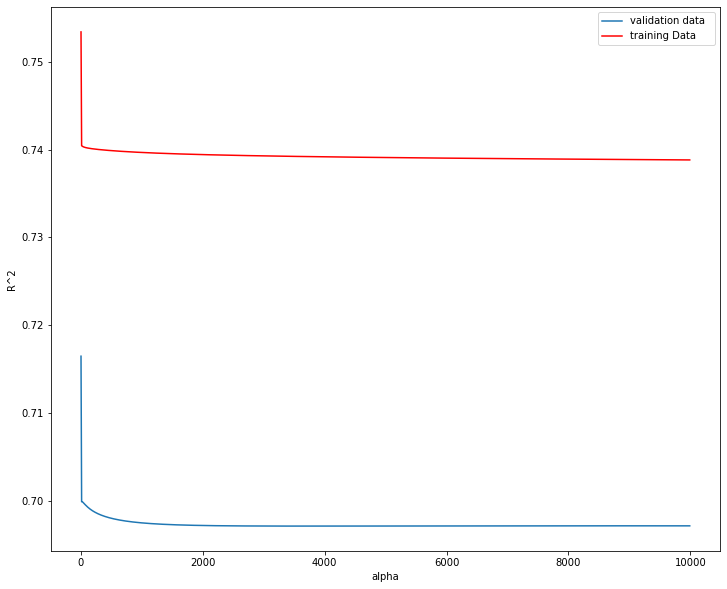

In [46]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


#the blue line represents R2 OF TEST data and line represents r2 of training data

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [50]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [52]:
Grid1.fit(x_data[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]], y_data)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
BestRR.score(x_test[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]], y_test)

0.6495178096460498